In [49]:
#라이브러리 불러오기
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

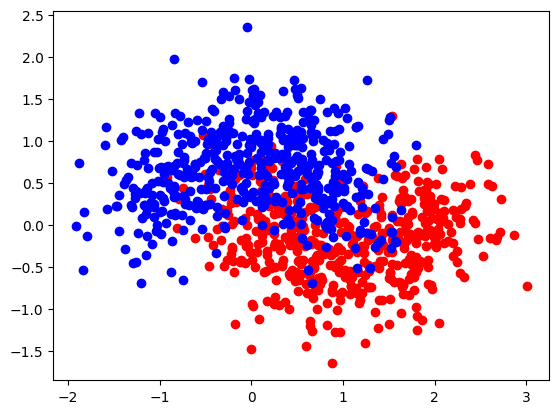

In [50]:
#make_moons로 데이터 가져오기
x, y = make_moons(n_samples=1000, noise=0.4)

plt.plot(x[y==1,0],x[y==1,1],marker='o',linestyle='',color='red')
plt.plot(x[y==0,0],x[y==0,1],marker='o',linestyle='',color='blue')
plt.show()

In [51]:
#훈련 세트와 테스트 세트 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42, test_size=0.25)

In [52]:
#모델 학습(결정트리) -> 기본모델 성능 측정
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.804

In [53]:
#교차검증
#scores=cross_validate(dt, x_train, y_train)
scores = cross_val_score(dt, x_train, y_train, cv = 5)

print(scores)

[0.77333333 0.82666667 0.82       0.84       0.8       ]


In [57]:
#그리드탐색
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

gs.fit(x_train, y_train)
gs.score(x_test, y_test)


print('최적 파라미터 값 : ', gs.best_params_)
print('점수 : ', gs.best_score_)

최적 파라미터 값 :  {'max_leaf_nodes': 4, 'min_samples_split': 2}
점수 :  0.8506666666666668
